### 使用环境
使用集成环境的Anaconda3 2023.03-1(Python 3.10.9 64-bit)程序或者
预先安装 pandas=1.5.3, matplotlib=3.7.0, **scikit-learn=1.2.1** 库, python=3.10.9。

### 数据说明
对引入的csv数据表中的所有数据进行聚类及运算，故只导入需要聚类的数据维度即可，若是想综合分析，可使用生成的带标签文件。

### 使用说明
配置好需要聚类的数据csv文件，设置好聚类数（或聚类范围），运算结果会生成在原始csv文件同目录下。

### 其他
软件所用代码已集成到图形化界面，可至 [Github](https://github.com/TigerHall/GeoKmeans) 中 [下载](https://github.com/TigerHall/GeoKmeans/releases/tag/GEO) 使用。
有任何问题，欢迎与作者（邮箱：[hehuhall@outlook.com](mailto:hehuhall@outlook.com)）交流。

In [18]:
# K-means++聚类。
import pandas as pd
from sklearn.cluster import KMeans

# 引入csv数据(跳过表头1行)
filename = './聚类所用数据.csv'
data = pd.read_csv(filename)

# 设置聚类数
k = 31

# 固定随机种子
random_seed = 42

# 聚类计算（聚类数k及对应数据data）
kmeans = KMeans(init='k-means++', n_init='auto',
                n_clusters=k, random_state=random_seed).fit(data)


# 输出聚类中心结果
jlzx = pd.DataFrame(kmeans.cluster_centers_)
jlzx.columns = data.columns.values
jlzx.index.name = 'ID'
# 如果三种铅同位素存在则计算Δ7/4，Δ8/4
if set(['PB206_PB204', 'PB207_PB204', 'PB207_PB204']).issubset(jlzx.columns):
    jlzx.insert(loc=0, column='Δ7/4',
                value=((jlzx['PB207_PB204']-0.1084*jlzx['PB206_PB204']-13.491)*100))
    jlzx.insert(loc=1, column='Δ8/4',
                value=((jlzx['PB208_PB204']-1.209*jlzx['PB206_PB204']-15.627)*100))
# 输出聚类中心结果
jlzx.to_csv(f'{filename}_聚_{k}_簇结果_随机{random_seed}.csv',
            index=True, header=True, encoding='utf_8_sig')

# 输出源数据及对应聚类标签簇
data.insert(loc=0, column='ID', value=kmeans.labels_)
# 如果三种铅同位素存在则计算Δ7/4，Δ8/4
if set(['PB206_PB204', 'PB207_PB204', 'PB207_PB204']).issubset(data.columns):
    data.insert(loc=1, column='Δ7/4',
                value=((data['PB207_PB204']-0.1084*data['PB206_PB204']-13.491)*100))
    data.insert(loc=2, column='Δ8/4',
                value=((data['PB208_PB204']-1.209*data['PB206_PB204']-15.627)*100))
# 输出聚类标签结果
data.to_csv(f'{filename}_聚_{k}_簇标签_随机{random_seed}.csv',
            index=False, header=True, encoding='utf_8_sig')

In [15]:
# 轮廓系数计算（聚类数参考）
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 引入csv数据(跳过表头1行)
filename = './聚类所用数据.csv'
data = pd.read_csv(filename)

# 设置聚类数范围(大于2)
Kran = range(2, 300, 1)

# 设置存放轮廓系数(silhouette coefficient)和SSE(sum of the squared errors，误差平方和)计算结果的数组
Silhouette = []
SSE = []
# 循环运算以获得各聚类数下的轮廓系数
for kk in Kran:
    # 定义KMeans，以及K值
    kmeans = KMeans(init='k-means++', n_init='auto',
                    n_clusters=kk, random_state=42)
    # 根据数据data进行聚类计算并获得聚类序列，结果存放于result_list中
    result_list = kmeans.fit_predict(data)
    # 将原始数据data和聚类序列result_list传入对应的函数计算出该结果下的轮廓系数
    score = silhouette_score(data, result_list)
    # 存放每种聚类数计算出的两个结果
    Silhouette.append(score)
    SSE.append(kmeans.fit(data).inertia_)

# 将数据转化为CSV
dfc = pd.DataFrame()
dfc['X(K值)'] = Kran
dfc['Y1(轮廓系数)'] = Silhouette
dfc['Y2(均值失真)'] = SSE
dfc.index.name = 'Ordinal'
dfc.to_csv('%s_轮廓系数计算[%s].csv' % (filename, Kran), index=True,
           header=True, encoding="utf_8_sig")

print('轮廓系数情况', dfc)


轮廓系数情况          X(K值)  Y1(轮廓系数)       Y2(均值失真)
Ordinal                                
0            2  0.506790  561137.213974
1            3  0.487518  382591.685141
2            4  0.507686  247319.765649
3            5  0.542028  197415.967365
4            6  0.522125  155644.373208
...        ...       ...            ...
293        295  0.459781      64.308322
294        296  0.458462      63.816261
295        297  0.458659      63.017709
296        298  0.458269      62.158353
297        299  0.457130      61.232208

[298 rows x 3 columns]


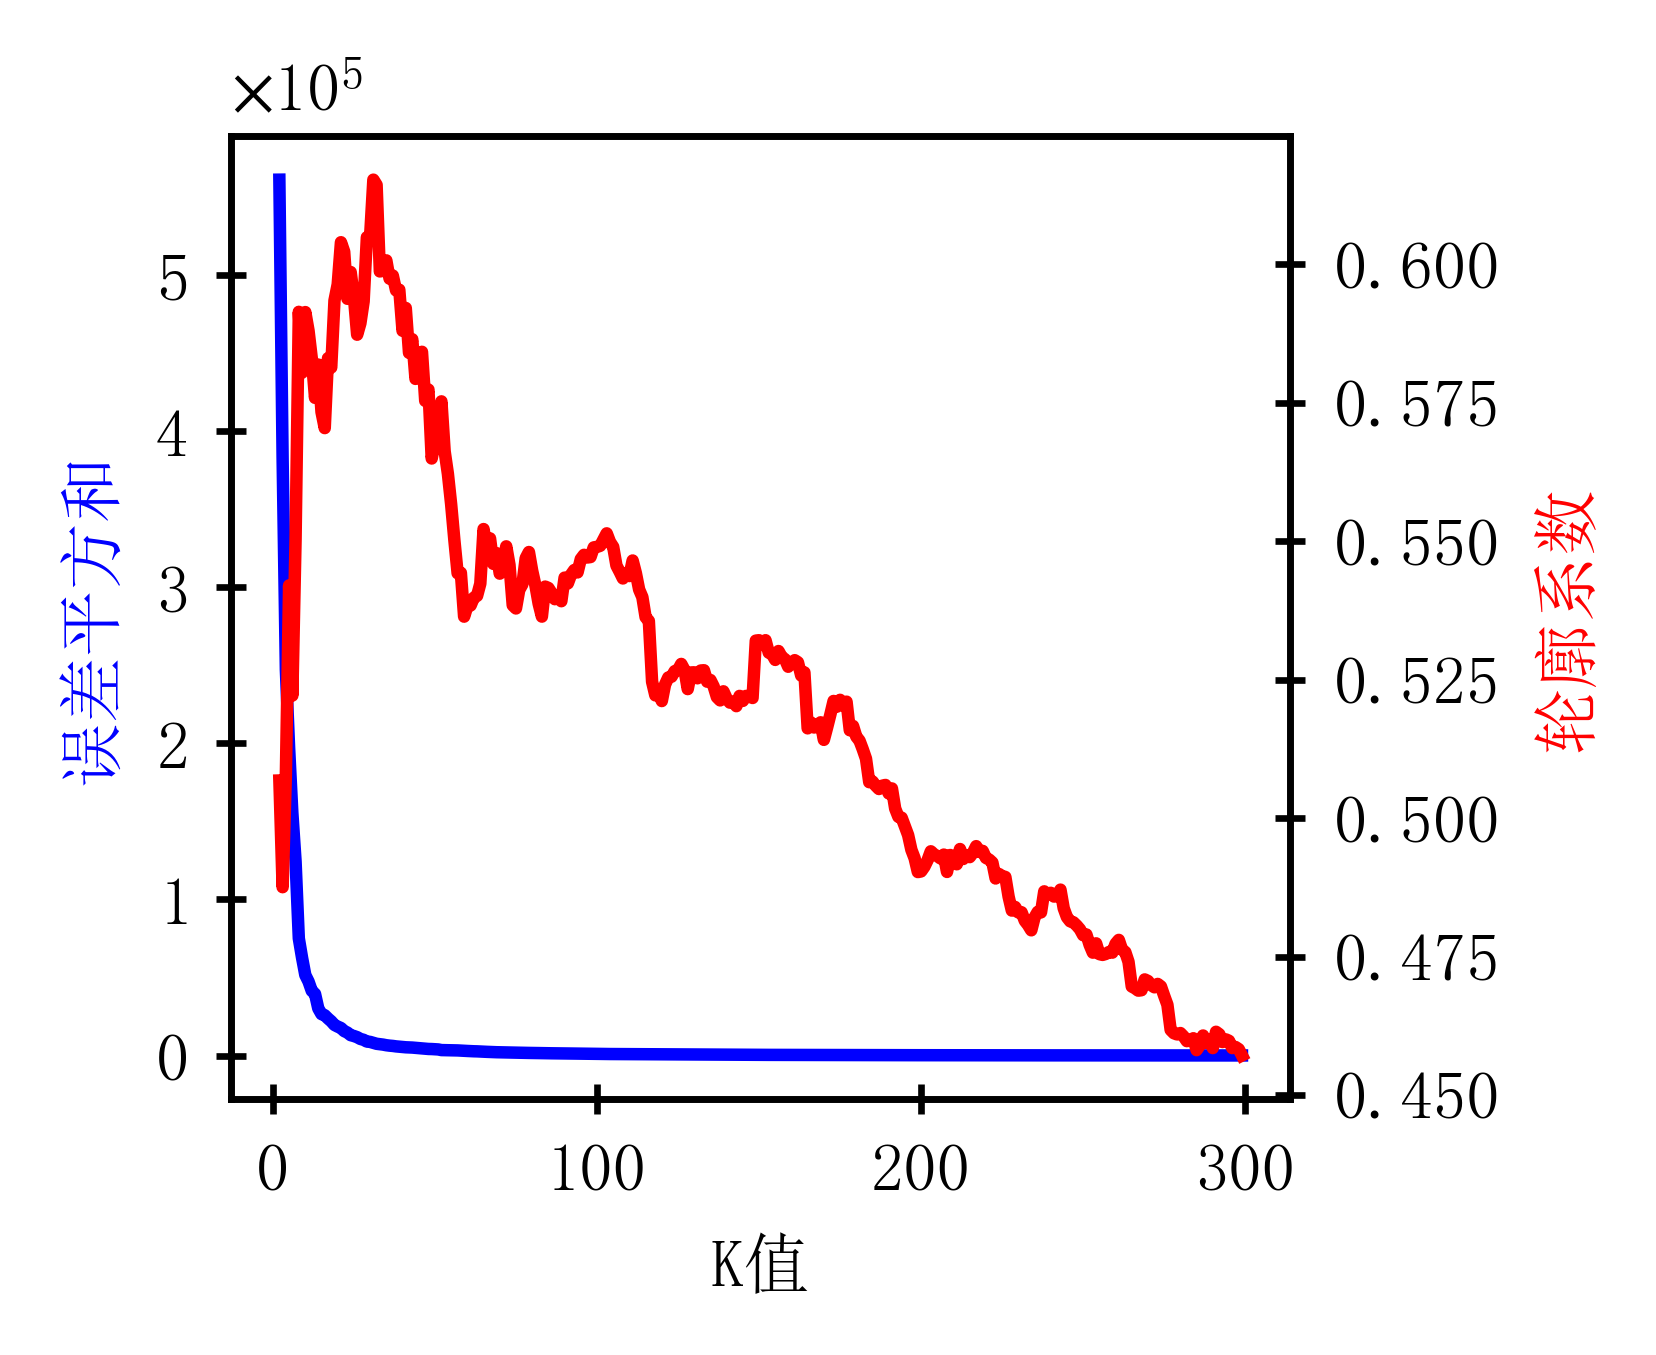

In [17]:
# 数据绘图
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 中文正常显示设置
config = {
    "font.family": 'serif',  # 衬线字体
    "font.size": 8,  # 字体大小
    "font.serif": ['SimSun'],  # 宋体
    "mathtext.fontset": 'stix',  # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False  # 处理负号，即-号
}
rcParams.update(config)

# 绘图
fig, ax1 = plt.subplots(dpi=600,figsize=(2.8, 2.3))
# 用同一个X轴
ax2 = ax1.twinx()
# 绘制线
ax1.plot(Kran, SSE, 'b-', linewidth=1.5)
ax2.plot(Kran, Silhouette, 'r-', linewidth=1.5)

# 设置轴标题
ax1.set_xlabel('K值', color='k')
ax1.set_ylabel('误差平方和', color='b')
ax2.set_ylabel('轮廓系数', color='r')
# 设置轴标签样式
ax1.tick_params(tickdir='inout', labelsize=8)
ax1.ticklabel_format(style='sci', axis='y',
                     scilimits=(-1, 2), useMathText=True)
ax2.tick_params(tickdir='inout', labelsize=8)

# 图输出
plt.tight_layout()
plt.savefig(fname=f"{filename}_轮廓系数及误差平方和_{Kran}.svg",
            format="svg", dpi=600, transparent=True, bbox_inches='tight')
plt.show()
